<a href="https://colab.research.google.com/github/adityanarayanan13/Assignment-1-S.Aditya-Narayanan/blob/main/Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.diagnostic import linear_rainbow
from google.colab import files

uploaded = files.upload()

Saving tips (data for regression problem).csv to tips (data for regression problem).csv


In [ ]:
df = pd.read_csv('tips (data for regression problem).csv')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
df = pd.get_dummies(df, columns=['sex', 'smoker', 'day', 'time'], drop_first=True)

In [ ]:
X = df.drop(columns='tip')
y = df['tip']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    print(f"Model: {model.__class__.__name__}")
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared: {r2}")
    print("\n")

# Linear Regression
evaluate_model(LinearRegression(), X_train, X_test, y_train, y_test)

# Ridge Regression
evaluate_model(Ridge(alpha=1.0), X_train, X_test, y_train, y_test)

# Lasso Regression
evaluate_model(Lasso(alpha=0.1), X_train, X_test, y_train, y_test)

# Decision Tree Regressor
evaluate_model(DecisionTreeRegressor(max_depth=5), X_train, X_test, y_train, y_test)

# Random Forest Regressor
evaluate_model(RandomForestRegressor(n_estimators=100, random_state=42), X_train, X_test, y_train, y_test)

# Support Vector Regressor
evaluate_model(SVR(kernel='rbf'), X_train, X_test, y_train, y_test)

# K-Nearest Neighbors Regressor
evaluate_model(KNeighborsRegressor(n_neighbors=5), X_train, X_test, y_train, y_test)

Model: LinearRegression
Mean Squared Error: 0.7033566017436106
R-squared: 0.43730181943482493


Model: Ridge
Mean Squared Error: 0.7007477213216077
R-squared: 0.4393889716178484


Model: Lasso
Mean Squared Error: 0.5908528649971524
R-squared: 0.5273068720881755


Model: DecisionTreeRegressor
Mean Squared Error: 0.984300883690421
R-squared: 0.21254124151494058


Model: RandomForestRegressor
Mean Squared Error: 0.9196720148979602
R-squared: 0.2642455218065466


Model: SVR
Mean Squared Error: 0.5323763062616395
R-squared: 0.5740891915042663


Model: KNeighborsRegressor
Mean Squared Error: 0.8763725714285714
R-squared: 0.29888587066985495




In [ ]:
models = [
    LinearRegression(),
    Ridge(alpha=1.0),
    Lasso(alpha=0.1),
    DecisionTreeRegressor(max_depth=5),
    RandomForestRegressor(n_estimators=100, random_state=42),
    SVR(kernel='rbf'),
    KNeighborsRegressor(n_neighbors=5)
]

for model in models:
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
    print(f"{model.__class__.__name__} Cross-Validation MSE: {-np.mean(cv_scores)}")


LinearRegression Cross-Validation MSE: 1.1251842462248776
Ridge Cross-Validation MSE: 1.1216041882304242
Lasso Cross-Validation MSE: 1.0605979804997434
DecisionTreeRegressor Cross-Validation MSE: 1.2729981324594313
RandomForestRegressor Cross-Validation MSE: 1.1625471168784016
SVR Cross-Validation MSE: 1.125901933735864
KNeighborsRegressor Cross-Validation MSE: 1.351432650340136


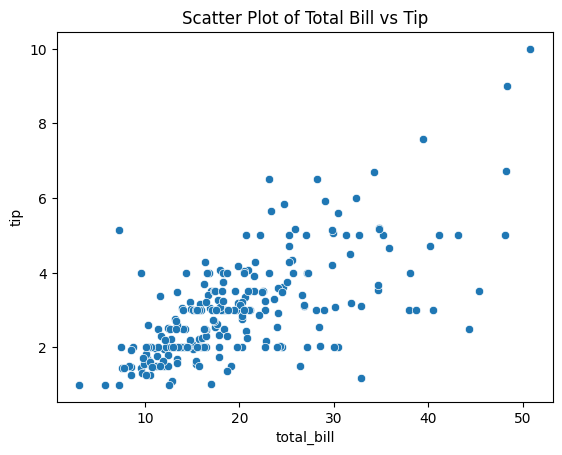

In [ ]:
sns.scatterplot(x='total_bill', y='tip', data=df)
plt.title('Scatter Plot of Total Bill vs Tip')
plt.show()

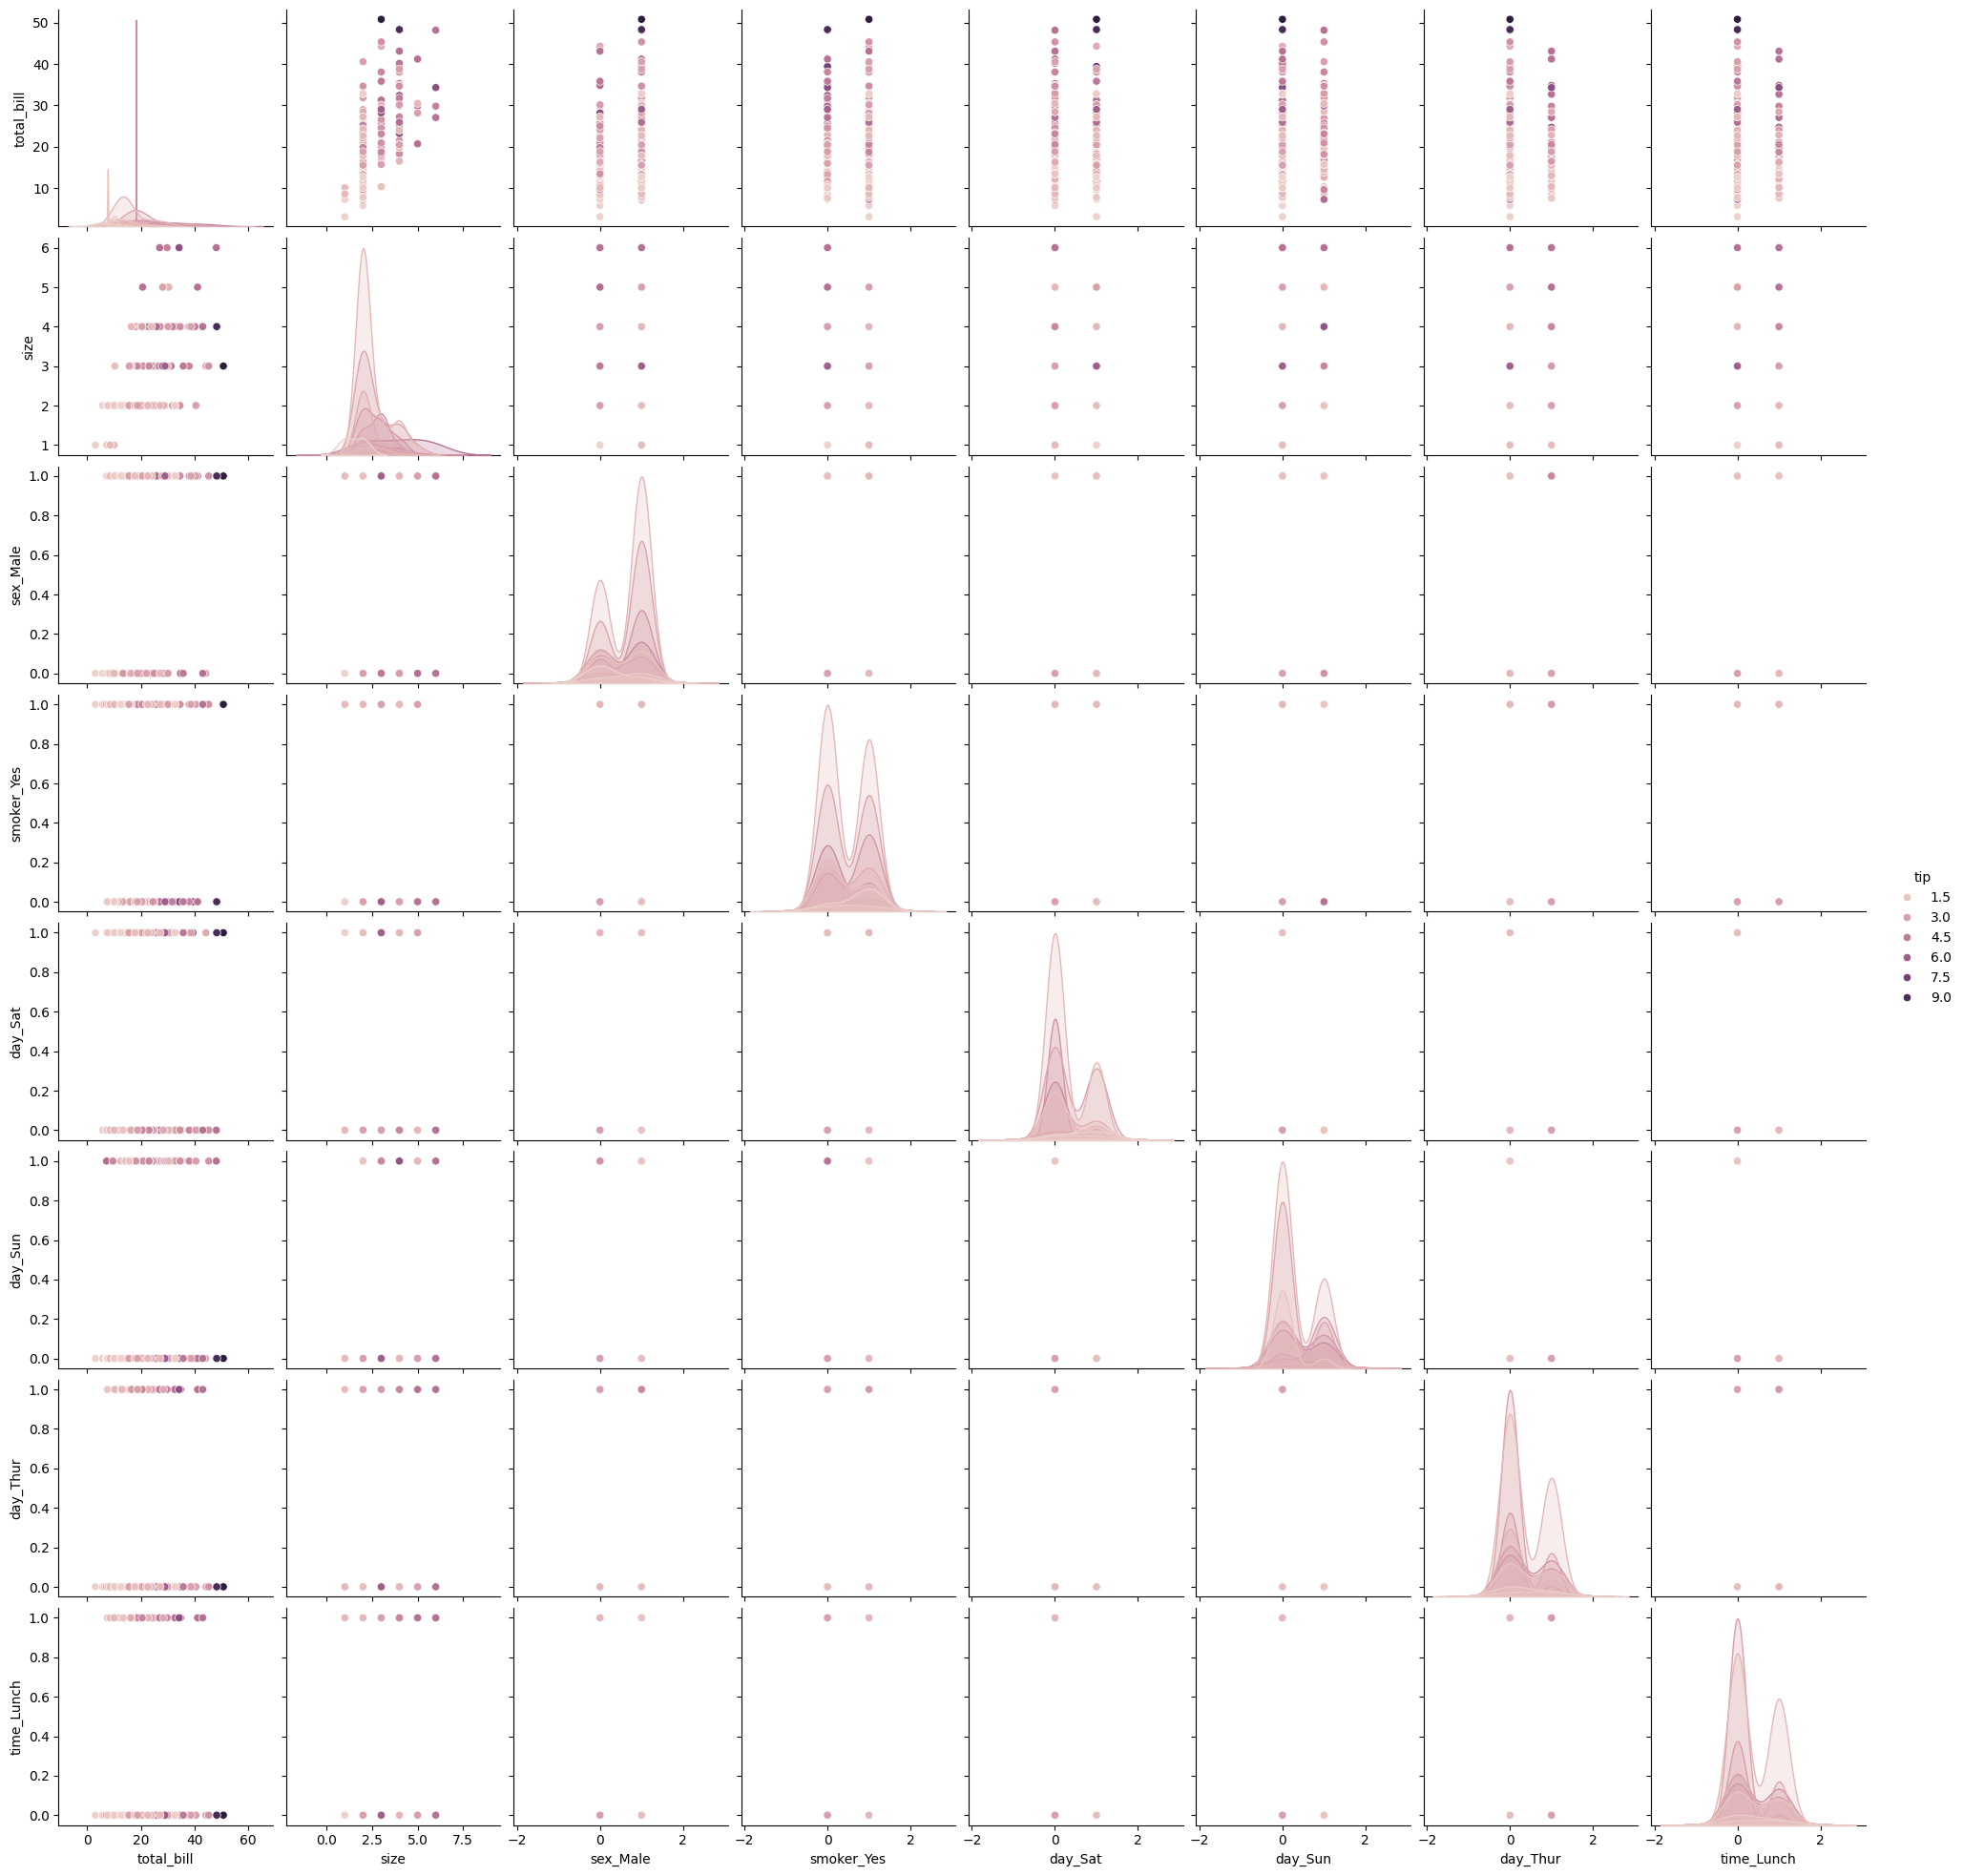

In [ ]:
sns.pairplot(df, hue='tip')
plt.show()

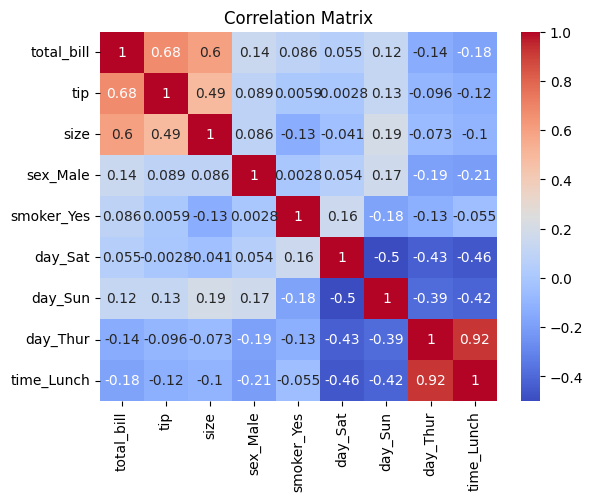

In [ ]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [ ]:
import statsmodels.api as sm

X = df[['total_bill', 'size']]
y = df['tip']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
rainbow_statistic, rainbow_p_value = linear_rainbow(model)

print(f"Rainbow test p-value: {rainbow_p_value}")
if rainbow_p_value > 0.05:
    print("The data is likely linear in nature.")
else:
    print("The data may not follow a linear trend.")


Rainbow test p-value: 0.17048935693447634
The data is likely linear in nature.


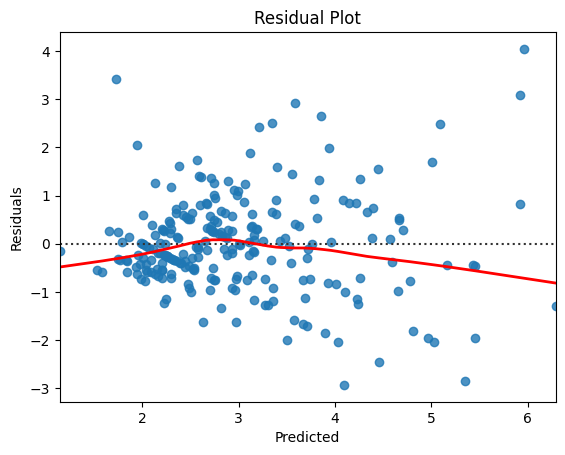

In [ ]:
predictions = model.predict(X)
residuals = y - predictions
sns.residplot(x=predictions, y=residuals, lowess=True, line_kws={'color': 'red', 'lw': 2})
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

**Model Performance Comparison**

Best Performing Model:
The Support Vector Regressor (SVR) achieved the highest R² score (0.574) and the lowest Mean Squared Error (MSE) of 0.532 among the models tested.
Lasso Regression also performed relatively well, with an R² of 0.527 and an MSE of 0.590.
These results suggest that SVR and Lasso Regression best capture the variance in tipping amounts based on the features available.

Model Stability:
The cross-validation results indicate that Lasso Regression has the lowest average cross-validation MSE (1.060), meaning it generalizes better than other models on unseen data.
Decision Tree and K-Nearest Neighbors had higher cross-validation MSE values, indicating more instability and variability across different data splits, which makes them less reliable.

Insights on Feature Influence:
Lasso Regression has the benefit of adding regularization, which helps identify the most impactful features by reducing or eliminating less influential ones. This model's relatively good performance suggests that some features may not strongly impact tipping and could be lessened or ignored without a significant drop in prediction accuracy.
Since the SVR model performed best, it implies that tipping behavior is influenced by complex relationships between features, which SVR captures well through non-linear decision boundaries.

**Management Insights for Improving Tipping Outcomes**

Predictable Tipping Factors:

Total Bill:
There is a strong positive correlation (0.68) between total_bill and tip, confirming that as the total bill increases, the tip amount also tends to increase. This supports the idea that customers often tip as a percentage of the bill, making total_bill a crucial predictor for tip. Management could encourage upselling (e.g., drinks, desserts) to increase both bill size and likely tips.

Size (Number of People):
The size of the group has a moderate positive correlation (0.49) with tip, indicating that larger groups tend to leave higher tips. This could be due to larger groups having larger bills, which in turn leads to higher tips. Therefore, prioritizing attentive service to larger groups could boost overall tipping.

Sex, Smoker, Day, and Time:
Sex (encoded as sex_Male), smoker_Yes, day variables (day_Sat, day_Sun, day_Thur), and time_Lunch show very low correlations with tip, ranging from -0.12 to 0.13.

Sex: No significant difference in tipping behavior between male and female customers.

Smoker Status: Being a smoker or not has little impact on the tip amount.

Day of the Week: The day does not influence tips significantly, with low correlations for each day.

Time of Day: The difference between lunch and dinner is minimal in terms of tipping amounts.




**Potential for Enhancing Service Quality:**
The moderate R² values across all models (highest at 0.574) indicate that tipping behavior may also be influenced by factors not included in this dataset, such as service quality or customer satisfaction. Management could explore additional data collection on these aspects to refine prediction accuracy further.